# Gavin Dormer - S2464806

# Assignment_2


Automotive and Transportation: Plate profilers are used in the automotive and transportation industries for cutting metal plates used in vehicle chassis, frames, and body parts.

The ESAB is responsible for reported steel cut, to that end we must understand machine capacity, utilisation, uptime, downtime and bottle necks. With a particular focus on driving Nesting efficiencies, where and how can we improve nesting NC programs. 

With the tools this course has supplied, we have four weeks worth of .csv files from the ESAB machine to investigate. 


# Step 1: Import Python libraries and merge all data into one csv file

In [1]:
# Importing Python Libraries

import pandas as pd 
import numpy as np
import glob

# Providing instruction to display all coulumns

pd.set_option('display.max_columns', None)


There are 30 .csv files that contain data seperated by a ';' delimiter. The first step is to seperate the values and then store them in a dictionary. The second step is to merge all the files into one using the concat method and store them into a seperate files called 'merged_data.csv'

In [2]:
# Find all CSV files in the current directory with a specific pattern (e.g., all files ending with ".csv")
csv_files = glob.glob("plate_data/*.csv")

# Dictionary to store DataFrames
dataframes = {}

# Read each CSV file with ";" delimiter and store in the dictionary
for file in csv_files:
    dataframes[file] = pd.read_csv(file, delimiter=";")

# Concatenate DataFrames into one
merged_data = pd.concat(dataframes.values(), ignore_index=True)

# Save the merged DataFrame as a new CSV file
merged_data.to_csv("merged_data.csv", index=False, sep=";")


In [3]:
merged_data.to_csv("merged_data.csv", index=False)

In [4]:
# Importing ESAB_Production_Outputs data set

df = pd.read_csv('merged_data.csv')

# Taking an initial look at the data set

df.head()

,ProgramName,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,Process2Time,Process2Length,Process2Starts,Process3Time,Process3Length,Process3Starts,Process4Time,Process4Length,Process4Starts,RapidTime,RapidLength,RapidStarts
0,00003936,2025-06-21 00:39:33,2025-06-21 01:57:50,True,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00004392,2025-06-21 03:04:26,2025-06-21 03:26:32,False,1325,23,4,324,15738.717773,69,0,0,0,0,0,0,0,0,0,166,13397,99
2,00003887,2025-06-21 03:32:07,2025-06-21 04:07:38,False,2126,107,7,563,28534.375000,11,0,0,0,0,0,0,0,0,0,406,78358,82
3,00004472,2025-06-21 04:09:00,2025-06-21 04:21:51,False,766,6,1,409,19713.322266,12,0,0,0,0,0,0,0,0,0,142,36295,25
4,00004423,2025-06-21 04:30:43,2025-06-21 04:41:09,True,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0


# Step 2: Create a deepcopy

In [5]:
# Import Python copy function & deepcopy function within copy

import copy
from copy import deepcopy

In [6]:
# Create a deepcopy of ESAB_Production_Outputs data set

df = df.copy()

# Step 3: Clean data & investigate data size

In [7]:
# Display header of each column

df.columns

Index(['ProgramName', 'Start', 'End', 'Cancelled', 'TotalTime', 'BreakingTime',
       'NumberBreaks', 'Process1Time', 'Process1Length', 'Process1Starts',
       'Process2Time', 'Process2Length', 'Process2Starts', 'Process3Time',
       'Process3Length', 'Process3Starts', 'Process4Time', 'Process4Length',
       'Process4Starts', 'RapidTime', 'RapidLength', 'RapidStarts'],
      dtype='object')

In [8]:
# Use this argument to measure the size of this data set
# In this case we have 23 columns and 605 rows 

df.shape 

(547, 22)

There are multiple columns that do not contain valuable or usable data.

In [9]:
# Below we remove columns that do not contain valuable or usable data

df = df.drop(df.columns[10:19], axis=1)

In [10]:
# Establishing above change was successful

df.columns

Index(['ProgramName', 'Start', 'End', 'Cancelled', 'TotalTime', 'BreakingTime',
       'NumberBreaks', 'Process1Time', 'Process1Length', 'Process1Starts',
       'RapidTime', 'RapidLength', 'RapidStarts'],
      dtype='object')

In [11]:
# Now taking another look at the data set post dropping unwanted columns
# From this view we can establish that in the 'ProgramName' column we have duplicated Program ID's

df.head()

,ProgramName,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
0,00003936,2025-06-21 00:39:33,2025-06-21 01:57:50,True,0,0,0,0,0.000000,0,0,0,0
1,00004392,2025-06-21 03:04:26,2025-06-21 03:26:32,False,1325,23,4,324,15738.717773,69,166,13397,99
2,00003887,2025-06-21 03:32:07,2025-06-21 04:07:38,False,2126,107,7,563,28534.375000,11,406,78358,82
3,00004472,2025-06-21 04:09:00,2025-06-21 04:21:51,False,766,6,1,409,19713.322266,12,142,36295,25
4,00004423,2025-06-21 04:30:43,2025-06-21 04:41:09,True,0,0,0,0,0.000000,0,0,0,0


In [12]:
# Remove leading zeros from the 'col1' column
df['ProgramName'] = df['ProgramName'].str.lstrip('0')

In [13]:
# The column header 'ProgramName' contains the Nest numbers produced by the Nesting CAM system we use
# Every Nest created has a unique Nesting ID
# Nest ID = 'ProgramNumber'
# Using below argument to identify duplicated Program ID's throughout the entire data set

df.duplicated(subset=['ProgramName'])

0      False
1      False
2      False
3      False
4      False
       ...  
542    False
543    False
544    False
545     True
546     True
Length: 547, dtype: bool

In [14]:
# Now using below code to numerically quantify the volume of duplictaed Program ID's
# This code has indicated that we have 345 duplicated Program ID's

df.duplicated(subset=['ProgramName', ]).sum()

345

In [15]:
# Using below argument to allow the viewing of all rows
# All rows can now be viewed by using the scrolling function within the desired window 

pd.set_option('display.max_rows', df.shape[0]+1)

In [16]:
# Now that we have identified that we have 342 duplicated Program ID's we can go ahead and delete all duplications
# Using the .drop function allows us to delete duplications
#'Keep First' argument provides instruction to keep the first instance of Program ID and delete all subsequent duplications 

df = df.drop_duplicates(subset='ProgramName', keep="first")

# Taking a look at the data set to establish if the duplication deletion has been successful
# Below confirms it has worked

df

,ProgramName,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
0,3936,2025-06-21 00:39:33,2025-06-21 01:57:50,True,0,0,0,0,0.000000,0,0,0,0
1,4392,2025-06-21 03:04:26,2025-06-21 03:26:32,False,1325,23,4,324,15738.717773,69,166,13397,99
2,3887,2025-06-21 03:32:07,2025-06-21 04:07:38,False,2126,107,7,563,28534.375000,11,406,78358,82
3,4472,2025-06-21 04:09:00,2025-06-21 04:21:51,False,766,6,1,409,19713.322266,12,142,36295,25
4,4423,2025-06-21 04:30:43,2025-06-21 04:41:09,True,0,0,0,0,0.000000,0,0,0,0
6,4402,2025-06-21 05:43:52,2025-06-21 05:49:27,False,333,2,2,183,4500.993164,4,32,4732,9
7,4334,2025-06-21 06:12:14,2025-06-21 06:43:59,False,1900,18,2,460,27593.513672,78,287,29236,162
8,4380,2025-06-21 07:45:23,2025-06-21 08:32:55,False,2845,201,20,700,33640.867188,54,506,86892,125
9,Module0006,2025-06-21 11:19:58,2025-06-21 11:24:30,False,271,130,2,118,5864.168457,2,3,405,2
10,4354,2025-06-21 13:17:00,2025-06-21 13:34:05,True,1023,12,2,470,18000.181641,4,170,36997,21


In [17]:
# Use this argument to measure the size of this data set
# In this case we have 13 columns and 205 rows
# This is now a significantly reduced data set size

df.shape

(202, 13)

In [18]:
# We want to investigate the 'Cancelled' column
# The cancelled column instructs if the NC Program was successfully ran or aborted/cancelled 
# This action is conducted by the machine Operator
# Programs can be cancelled for multiple reasons
# Cancelled Programs are of no use, to that end they must be deleted

df['Cancelled']

0       True
1      False
2      False
3      False
4       True
6      False
7      False
8      False
9      False
10      True
26      True
30     False
35      True
55     False
56     False
57     False
58      True
59      True
61     False
62     False
63     False
64     False
65      True
67     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False
77      True
85     False
86     False
87      True
97     False
98     False
107    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121     True
130    False
131    False
132    False
142    False
148     True
154     True
156    False
157     True
162    False
167     True
178     True
190    False
191     True
195     True
198    False
199    False
200     True
205     True
211     True
213    False
214    False
215    False
216    False
217    False
218    False

In [19]:
# Again using the .drop command to delete all cancelled Programs
# In above cell you can see the list with each line containing a True or False statement 
# True = Program was cancelled 
# False = Program was executed successfully 
# Now we delete all True statements 

# Remove rows where the value in the 'Cancelled' column is 'True'. This code works because 'Cancelled' contains boolean values
df = df[~df['Cancelled']]

In [20]:
# Checking the data shape to ensure the above .drop command has been successfull
# The data shape has changed in size 
# Columns remain unchanged but rows has reduced in size, this is what we would expect to see
# from comparing previous data shape to this data shape we can establish that 64 cancelled Programs have been deleted 

df.shape

(140, 13)

In [21]:
# We want to investigate the 'ProgramName' column
# This time not for duplications but for Program ID's that are not generated by the software
# By scrolling through below list you can easily identify Program ID's that do not conform to auto generated software ID's
# Program ID's that do not follow the same name stucture have been self generated programs by the Operator
# Non software generated Programs are not wanted for this study

df['ProgramName']

1                                  4392
2                                  3887
3                                  4472
6                                  4402
7                                  4334
8                                  4380
9                            Module0006
30                                 4515
55                                 4356
56                                 4297
57                                 4332
61                                 4370
62                                 4246
63                                 4369
64                                 4368
67       beatson Module0006 2000 x 1200
69                                 3986
70                                 3987
71                                 3988
72                                 3989
73                                 3516
74                                 3517
75                                 3519
76                                 3518
85                                 3804


In [22]:
# Convert 'ProgramName' to numeric values and drop rows with non-numeric data
df = df[pd.to_numeric(df['ProgramName'], errors='coerce').notna()]

print(df)

    ProgramName                Start                  End  Cancelled  \
1          4392  2025-06-21 03:04:26  2025-06-21 03:26:32      False   
2          3887  2025-06-21 03:32:07  2025-06-21 04:07:38      False   
3          4472  2025-06-21 04:09:00  2025-06-21 04:21:51      False   
6          4402  2025-06-21 05:43:52  2025-06-21 05:49:27      False   
7          4334  2025-06-21 06:12:14  2025-06-21 06:43:59      False   
8          4380  2025-06-21 07:45:23  2025-06-21 08:32:55      False   
30         4515  2025-06-22 00:14:33  2025-06-22 00:18:58      False   
55         4356  2025-06-30 10:16:52  2025-06-30 12:08:54      False   
56         4297  2025-06-30 14:23:33  2025-06-30 19:12:07      False   
57         4332  2025-06-30 20:53:57  2025-06-30 21:39:23      False   
61         4370  2025-07-01 22:36:25  2025-07-02 03:35:28      False   
62         4246  2025-07-02 06:15:19  2025-07-02 12:12:17      False   
63         4369  2025-07-02 16:11:27  2025-07-02 19:27:53      F

In [23]:
# Once again usung the .shape function we can establish if the above .drop function has been successful
# We can tell by the shape it has been successful 
# We have maintained the same number of columns but reduced the number of cells by a further 20

df.shape

(110, 13)

We continue to investigate, work through and clean column.
This time we look at the 'BreakingTime', 'Process1Time', 'Process1Length'and 'RapidLength' columns.
'BreakingTime' is the time allocated to removing finished cut parts from the machine bed.
'Process1Time' is the time duration of the Plasma Cutting Torch.
'ProcessLength' is the linear length travelled by the Plasma Cutting Torch whilst physically cutting. 
For 'BreakingTime' and 'Process1Time' the values can range from only a few seconds for one large rectangular part to several hours for a very busy and intricate Nest and are measured in seconds.
For example 30 minutes = 1800 seconds. 
For 'Process1Length', linear length travelled whilst cutting is measured in mm.
For 'RapidLength', linear length travelled whilst NOT cutting is measured in mm.
For example 275000mm = 275 meters 

In [24]:


# Check if any of the columns have the value of 0
cols_with_zero = (df[['BreakingTime', 'Process1Time', 'Process1Length', 'RapidLength']] == 0).any(axis=1)

# Remove rows where any of the columns have the value of 0
df = df[~cols_with_zero]

df.shape

(109, 13)

In [25]:
# Taking another quick view of the data set, it is usfull to do this every so often to ensure all is looking as expected

df.head() 

,ProgramName,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
1,4392,2025-06-21 03:04:26,2025-06-21 03:26:32,False,1325,23,4,324,15738.717773,69,166,13397,99
2,3887,2025-06-21 03:32:07,2025-06-21 04:07:38,False,2126,107,7,563,28534.375000,11,406,78358,82
3,4472,2025-06-21 04:09:00,2025-06-21 04:21:51,False,766,6,1,409,19713.322266,12,142,36295,25
6,4402,2025-06-21 05:43:52,2025-06-21 05:49:27,False,333,2,2,183,4500.993164,4,32,4732,9
7,4334,2025-06-21 06:12:14,2025-06-21 06:43:59,False,1900,18,2,460,27593.513672,78,287,29236,162


In [26]:
# Now confirming above action and setting the Index as 'ProgramName'

df.set_index('ProgramName', inplace = True) 

# Taking another look at data set and ensuring changes are active
# We can confirm from below this has been successful

df.head()

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4392,2025-06-21 03:04:26,2025-06-21 03:26:32,False,1325,23,4,324,15738.717773,69,166,13397,99
3887,2025-06-21 03:32:07,2025-06-21 04:07:38,False,2126,107,7,563,28534.375000,11,406,78358,82
4472,2025-06-21 04:09:00,2025-06-21 04:21:51,False,766,6,1,409,19713.322266,12,142,36295,25
4402,2025-06-21 05:43:52,2025-06-21 05:49:27,False,333,2,2,183,4500.993164,4,32,4732,9
4334,2025-06-21 06:12:14,2025-06-21 06:43:59,False,1900,18,2,460,27593.513672,78,287,29236,162


# Step 4: Summary of Size and Shape of Data Set 

In [29]:
# Use .describe argument to display Stats on the data set

df.describe()

,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,4918.660550,1221.770642,10.724771,1372.486239,65370.505457,81.944954,592.688073,97596.000000,208.394495
std,6552.843402,2973.778871,13.749661,1703.205652,78333.624293,138.317525,740.254194,112671.364908,307.893591
min,97.000000,1.000000,1.000000,17.000000,790.184509,1.000000,3.000000,322.000000,3.000000
25%,871.000000,7.000000,2.000000,330.000000,19009.492188,12.000000,107.000000,17862.000000,37.000000
50%,1900.000000,67.000000,4.000000,630.000000,31885.144531,30.000000,269.000000,45562.000000,83.000000
75%,6720.000000,628.000000,14.000000,1564.000000,72395.187500,69.000000,742.000000,141306.000000,208.000000
max,34267.000000,19043.000000,54.000000,8492.000000,359600.250000,779.000000,3285.000000,395781.000000,1645.000000


In [30]:
# Display comprehensive evaluation of dataset, (memory usage, number of columns, data types etc)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 4392 to 4533
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Start           109 non-null    object 
 1   End             109 non-null    object 
 2   Cancelled       109 non-null    bool   
 3   TotalTime       109 non-null    int64  
 4   BreakingTime    109 non-null    int64  
 5   NumberBreaks    109 non-null    int64  
 6   Process1Time    109 non-null    int64  
 7   Process1Length  109 non-null    float64
 8   Process1Starts  109 non-null    int64  
 9   RapidTime       109 non-null    int64  
 10  RapidLength     109 non-null    int64  
 11  RapidStarts     109 non-null    int64  
dtypes: bool(1), float64(1), int64(8), object(2)
memory usage: 10.3+ KB


# Step 5: Convert data types to integers 

In [31]:
# We want to convert data types to integers
# First we convert data types to float before changing to integers, this is a Python quirk 

df = df.astype(float, errors='ignore')
df.dtypes

Start              object
End                object
Cancelled         float64
TotalTime         float64
BreakingTime      float64
NumberBreaks      float64
Process1Time      float64
Process1Length    float64
Process1Starts    float64
RapidTime         float64
RapidLength       float64
RapidStarts       float64
dtype: object

In [32]:
# Now we can convert from float to integers 

df = df.astype(int, errors='ignore')
df.dtypes

Start             object
End               object
Cancelled          int32
TotalTime          int32
BreakingTime       int32
NumberBreaks       int32
Process1Time       int32
Process1Length     int32
Process1Starts     int32
RapidTime          int32
RapidLength        int32
RapidStarts        int32
dtype: object

# Step 6: Data Analysis

In [33]:
# Now we want to start analysing the cleaned data 
# Lets look at the columns that supply valuable information
# The most valuable columns for this investigation are....
#                                                        'TotalTime'
#                                                        'BreakingTime'
#                                                        'Process1Time'
#                                                        'Process1Length' 
#                                                        'RapidLength'

#Each of these columns and the info they provide are described in detail earlier

# Use the .sort command to list 'TotalTime'
# 'TotalTime' is the Program run time from Start to Finsh, measured in seconds
# Values are displayed below in numerical and ascending order 

df.sort_values('TotalTime')

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4600,2025-07-05 07:22:37,2025-07-05 07:24:19,0,97,2,1,17,790,2,3,322,3
4138,2025-06-26 18:19:53,2025-06-26 18:23:56,0,242,7,1,22,1334,1,44,6742,14
4261,2025-06-27 12:33:15,2025-06-27 12:38:28,0,312,3,1,95,6229,9,28,5207,15
3519,2025-07-03 18:34:54,2025-07-03 18:40:22,0,323,16,3,62,4541,10,56,7195,20
4402,2025-06-21 05:43:52,2025-06-21 05:49:27,0,333,2,2,183,4500,4,32,4732,9
3986,2025-07-03 16:58:14,2025-07-03 17:04:13,0,358,2,1,133,9806,3,43,8159,14
4710,2025-07-20 05:35:50,2025-07-20 05:42:27,0,395,3,1,197,8016,3,45,10520,12
3987,2025-07-03 17:05:27,2025-07-03 17:13:26,0,475,2,2,145,10753,3,79,12804,24
3988,2025-07-03 17:15:43,2025-07-03 17:23:50,0,481,20,1,185,13621,4,70,10174,22


In [34]:
# Again using .sort command to list 'BreakingTimes' in the same order and fashion as above cell

df.sort_values('BreakingTime')

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4577,2025-07-05 17:40:04,2025-07-05 18:03:49,0,1421,1,1,410,21202,47,263,35003,102
4530,2025-06-29 01:45:00,2025-06-29 02:16:36,0,1892,1,2,1265,56850,55,55,4406,56
3518,2025-07-03 23:09:16,2025-07-03 23:18:30,0,549,1,2,113,11533,28,57,8889,38
3516,2025-07-03 17:39:22,2025-07-03 17:50:31,0,664,1,1,119,8569,27,84,11121,46
4531,2025-06-29 01:05:55,2025-06-29 01:37:09,0,1868,1,2,1352,60286,45,43,4452,46
4267,2025-06-22 23:38:24,2025-06-22 23:52:41,0,855,1,1,290,18906,29,98,14895,53
4632,2025-07-11 15:27:46,2025-07-11 15:59:12,0,1882,1,1,750,47492,42,340,34922,155
4266,2025-06-23 00:14:53,2025-06-23 00:29:25,0,871,2,2,285,18291,30,107,17862,54
3987,2025-07-03 17:05:27,2025-07-03 17:13:26,0,475,2,2,145,10753,3,79,12804,24


In [35]:
# Now we look at 'Process1Time' in the same order and fashion as above cell

df.sort_values('Process1Time')

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4600,2025-07-05 07:22:37,2025-07-05 07:24:19,0,97,2,1,17,790,2,3,322,3
4138,2025-06-26 18:19:53,2025-06-26 18:23:56,0,242,7,1,22,1334,1,44,6742,14
3519,2025-07-03 18:34:54,2025-07-03 18:40:22,0,323,16,3,62,4541,10,56,7195,20
4261,2025-06-27 12:33:15,2025-06-27 12:38:28,0,312,3,1,95,6229,9,28,5207,15
3518,2025-07-03 23:09:16,2025-07-03 23:18:30,0,549,1,2,113,11533,28,57,8889,38
3517,2025-07-03 18:22:28,2025-07-03 18:33:33,0,661,12,2,115,8276,27,80,10146,48
3516,2025-07-03 17:39:22,2025-07-03 17:50:31,0,664,1,1,119,8569,27,84,11121,46
3986,2025-07-03 16:58:14,2025-07-03 17:04:13,0,358,2,1,133,9806,3,43,8159,14
3987,2025-07-03 17:05:27,2025-07-03 17:13:26,0,475,2,2,145,10753,3,79,12804,24


In [37]:
# This time we look at 'Process1Length' 
# Note, the measurment is displayed in mm
# Again this is listed in ascending order

df.sort_values('Process1Length') 

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4600,2025-07-05 07:22:37,2025-07-05 07:24:19,0,97,2,1,17,790,2,3,322,3
4138,2025-06-26 18:19:53,2025-06-26 18:23:56,0,242,7,1,22,1334,1,44,6742,14
4402,2025-06-21 05:43:52,2025-06-21 05:49:27,0,333,2,2,183,4500,4,32,4732,9
3519,2025-07-03 18:34:54,2025-07-03 18:40:22,0,323,16,3,62,4541,10,56,7195,20
4598,2025-07-11 02:18:05,2025-07-11 02:30:02,0,712,6,1,151,5524,24,86,6210,51
4261,2025-06-27 12:33:15,2025-06-27 12:38:28,0,312,3,1,95,6229,9,28,5207,15
4710,2025-07-20 05:35:50,2025-07-20 05:42:27,0,395,3,1,197,8016,3,45,10520,12
3517,2025-07-03 18:22:28,2025-07-03 18:33:33,0,661,12,2,115,8276,27,80,10146,48
3516,2025-07-03 17:39:22,2025-07-03 17:50:31,0,664,1,1,119,8569,27,84,11121,46


In [38]:
# Lastly we look at 'RapidLength'
# Again Units are displayed in mm
# Again, values are listed in ascending order

df.sort_values('RapidLength')

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4600,2025-07-05 07:22:37,2025-07-05 07:24:19,0,97,2,1,17,790,2,3,322,3
4649,2025-07-13 05:37:34,2025-07-13 05:53:14,0,939,130,7,475,22663,21,30,4247,27
4530,2025-06-29 01:45:00,2025-06-29 02:16:36,0,1892,1,2,1265,56850,55,55,4406,56
4531,2025-06-29 01:05:55,2025-06-29 01:37:09,0,1868,1,2,1352,60286,45,43,4452,46
4402,2025-06-21 05:43:52,2025-06-21 05:49:27,0,333,2,2,183,4500,4,32,4732,9
4261,2025-06-27 12:33:15,2025-06-27 12:38:28,0,312,3,1,95,6229,9,28,5207,15
4598,2025-07-11 02:18:05,2025-07-11 02:30:02,0,712,6,1,151,5524,24,86,6210,51
4138,2025-06-26 18:19:53,2025-06-26 18:23:56,0,242,7,1,22,1334,1,44,6742,14
3519,2025-07-03 18:34:54,2025-07-03 18:40:22,0,323,16,3,62,4541,10,56,7195,20


In [40]:
# Now we want to focus on the top 5 Programs in terms of longst 'run time',
#                                                            'breaking time'
#                                                      'plasma torch cutting time' 
#                                            'plasma torch distance travelled whilst cutting'
#                                          'plasma torch distance travelled whilst NOT cutting'

# First we will look at 'TotalTime'
# We can use below argument to numerically list the top 5 values
# .nlargest displays values in descending order
# Units displayed in seconds
    
df.nlargest(n=5, columns=['TotalTime'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4613,2025-07-06 17:42:47,2025-07-07 03:13:55,0,34267,19043,49,5069,283682,355,2621,395781,1018
4209,2025-07-19 18:28:03,2025-07-20 02:21:24,0,28400,18951,47,2486,157182,183,1650,293269,548
4139,2025-06-23 19:56:40,2025-06-24 02:02:29,0,21944,2686,15,5624,340245,525,3285,390495,1645
4246,2025-07-02 06:15:19,2025-07-02 12:12:17,0,21416,2335,25,6783,312209,612,2885,355398,1349
4159,2025-07-06 10:15:03,2025-07-06 15:55:28,0,20424,3002,39,8492,359600,779,1514,144782,796


In [41]:
# Using same technique as above cell but for 'BreakingTime'
# Units displayed in seconds

df.nlargest(n=5, columns=['BreakingTime'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4613,2025-07-06 17:42:47,2025-07-07 03:13:55,0,34267,19043,49,5069,283682,355,2621,395781,1018
4209,2025-07-19 18:28:03,2025-07-20 02:21:24,0,28400,18951,47,2486,157182,183,1650,293269,548
4357,2025-07-13 11:52:09,2025-07-13 14:35:29,0,9797,8205,3,756,46995,15,311,78555,55
4185,2025-07-19 00:49:38,2025-07-19 06:14:40,0,19497,7597,17,4778,171068,214,2090,392637,685
3925,2025-06-23 05:34:13,2025-06-23 09:26:41,0,13945,5196,14,2319,139666,304,1580,232367,658


In [42]:
# Again as above but for 'ProcessTime'
# Units displayed in seconds

df.nlargest(n=5, columns=['Process1Time'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4159,2025-07-06 10:15:03,2025-07-06 15:55:28,0,20424,3002,39,8492,359600,779,1514,144782,796
4246,2025-07-02 06:15:19,2025-07-02 12:12:17,0,21416,2335,25,6783,312209,612,2885,355398,1349
4370,2025-07-01 22:36:25,2025-07-02 03:35:28,0,17941,4001,12,5933,259468,275,2228,376639,702
4139,2025-06-23 19:56:40,2025-06-24 02:02:29,0,21944,2686,15,5624,340245,525,3285,390495,1645
4409,2025-07-18 16:11:06,2025-07-18 18:59:17,0,10090,420,18,5254,191630,197,919,155499,418


In [43]:
# And now for 'Process1Length'
# Units are now displayed in mm

df.nlargest(n=5, columns=['Process1Length'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4159,2025-07-06 10:15:03,2025-07-06 15:55:28,0,20424,3002,39,8492,359600,779,1514,144782,796
4139,2025-06-23 19:56:40,2025-06-24 02:02:29,0,21944,2686,15,5624,340245,525,3285,390495,1645
4246,2025-07-02 06:15:19,2025-07-02 12:12:17,0,21416,2335,25,6783,312209,612,2885,355398,1349
4297,2025-06-30 14:23:33,2025-06-30 19:12:07,0,17313,2930,4,4809,294263,372,2659,350871,1196
4613,2025-07-06 17:42:47,2025-07-07 03:13:55,0,34267,19043,49,5069,283682,355,2621,395781,1018


In [44]:
# Lastly we look at 'RapidLength'
# As above Units are displayed in mm

df.nlargest(n=5, columns=['RapidLength'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
4613,2025-07-06 17:42:47,2025-07-07 03:13:55,0,34267,19043,49,5069,283682,355,2621,395781,1018
4185,2025-07-19 00:49:38,2025-07-19 06:14:40,0,19497,7597,17,4778,171068,214,2090,392637,685
4139,2025-06-23 19:56:40,2025-06-24 02:02:29,0,21944,2686,15,5624,340245,525,3285,390495,1645
4370,2025-07-01 22:36:25,2025-07-02 03:35:28,0,17941,4001,12,5933,259468,275,2228,376639,702
3804,2025-07-04 10:13:38,2025-07-04 13:37:14,0,12214,405,32,4294,169088,115,2040,365618,632


In [45]:
# This provides a breakdown of parts and their relative usage

count = []
for column in df:
    print(df[column].value_counts())                                    

2025-06-21 03:04:26    1
2025-07-16 21:33:49    1
2025-07-20 15:43:10    1
2025-07-20 11:55:38    1
2025-07-20 06:19:08    1
2025-07-20 05:35:50    1
2025-07-19 18:28:03    1
2025-07-19 00:49:38    1
2025-07-18 16:11:06    1
2025-07-18 02:38:38    1
2025-07-17 13:13:33    1
2025-07-17 06:50:48    1
2025-07-17 03:01:45    1
2025-07-14 23:42:25    1
2025-07-11 05:49:35    1
2025-07-14 12:26:27    1
2025-07-14 07:00:51    1
2025-07-13 11:52:09    1
2025-07-13 06:03:48    1
2025-07-13 05:37:34    1
2025-07-13 03:05:26    1
2025-07-13 01:11:33    1
2025-07-12 23:18:57    1
2025-07-12 02:56:25    1
2025-07-11 23:18:15    1
2025-07-11 15:27:46    1
2025-07-20 16:23:45    1
2025-06-23 00:56:41    1
2025-06-23 02:01:22    1
2025-06-23 02:20:32    1
2025-06-29 10:33:11    1
2025-06-29 08:03:07    1
2025-06-29 01:45:00    1
2025-06-29 01:05:55    1
2025-06-29 00:38:26    1
2025-06-28 11:32:14    1
2025-06-27 12:33:15    1
2025-06-26 21:43:42    1
2025-06-26 18:19:53    1
2025-06-26 17:46:22    1


# Step 7: Data Visualisation

In [46]:
# Fisrt we must import libraries to aid in data visualisation

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt


In [47]:
# Below .corr argument used to display correlation
# Column headers are presented in a matrix along X and Y Axis

df.corr()

,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalTime,NaN,1.000000,0.812022,0.663428,0.842820,0.881468,0.792395,0.911298,0.882816,0.869747
BreakingTime,NaN,0.812022,1.000000,0.565276,0.431282,0.499374,0.386292,0.567120,0.606288,0.485189
NumberBreaks,NaN,0.663428,0.565276,1.000000,0.496592,0.522882,0.420924,0.614669,0.692014,0.445164
Process1Time,NaN,0.842820,0.431282,0.496592,1.000000,0.963148,0.872624,0.828851,0.768551,0.837000
Process1Length,NaN,0.881468,0.499374,0.522882,0.963148,1.000000,0.865371,0.879858,0.812538,0.890125
Process1Starts,NaN,0.792395,0.386292,0.420924,0.872624,0.865371,1.000000,0.796543,0.654848,0.886239
RapidTime,NaN,0.911298,0.567120,0.614669,0.828851,0.879858,0.796543,1.000000,0.958862,0.952393
RapidLength,NaN,0.882816,0.606288,0.692014,0.768551,0.812538,0.654848,0.958862,1.000000,0.834235
RapidStarts,NaN,0.869747,0.485189,0.445164,0.837000,0.890125,0.886239,0.952393,0.834235,1.000000


In [48]:
# Displaying unique items in each column

unique_value = df.nunique().sort_values(ascending=False) 

unique_value

Start             109
End               109
TotalTime         109
Process1Length    109
RapidLength       109
RapidTime         105
Process1Time      104
RapidStarts        92
BreakingTime       79
Process1Starts     65
NumberBreaks       30
Cancelled           1
dtype: int64

In [49]:
# Showing values in above cell as percentages 

(unique_value)/(df.shape[0])*100

Start             100.000000
End               100.000000
TotalTime         100.000000
Process1Length    100.000000
RapidLength       100.000000
RapidTime          96.330275
Process1Time       95.412844
RapidStarts        84.403670
BreakingTime       72.477064
Process1Starts     59.633028
NumberBreaks       27.522936
Cancelled           0.917431
dtype: float64

# I have no idea what these graphs are about or where he found the random values

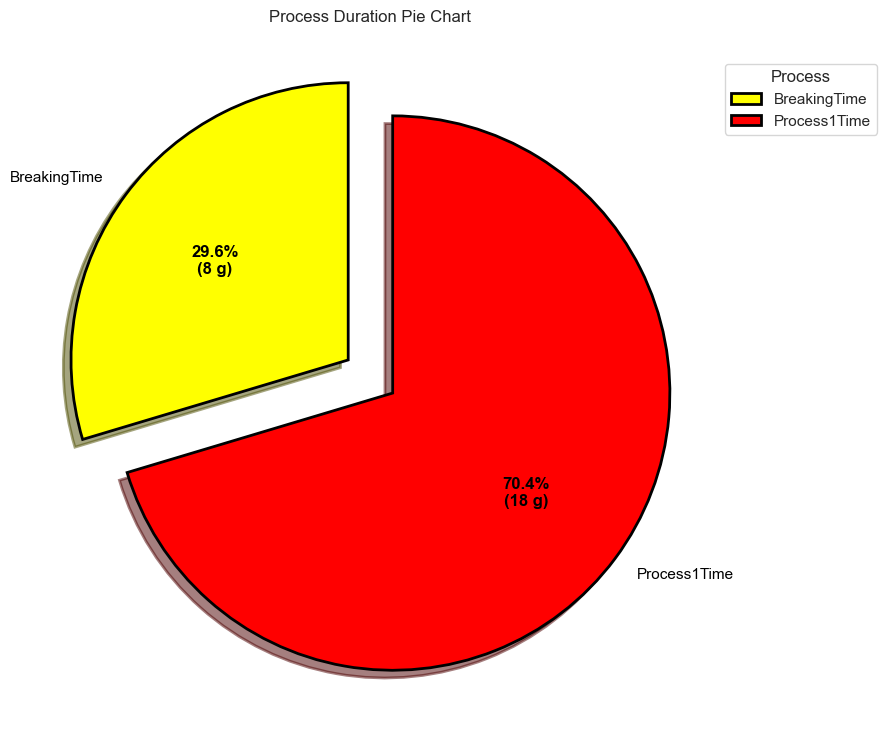

In [64]:
# We settled on this pie chart as it works very well with the data set we are investigating

# Looking at, and comparing 'BreakingTime' vs. 'ProcessTime'
# Clearly shows the stark correllation between time spent cutting and time spent breaking
# Results are startling
    

Process = ['BreakingTime', 'Process1Time']
 
data = [8, 19]
 
explode = (0.1, 0.1,)
 
colors = ( 'Yellow', 'Red',)    
 
wp = { 'linewidth' : 2, 'edgecolor' : 'Black' }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(12, 9))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Process,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ='Black'))
 
ax.legend(wedges, Process,
          title ='Process',
          loc ="center left",
          bbox_to_anchor =(1, 0.4, 5, 1))
 
plt.setp(autotexts, size = 12, weight ='bold')
ax.set_title('Process Duration Pie Chart')
 
plt.show()

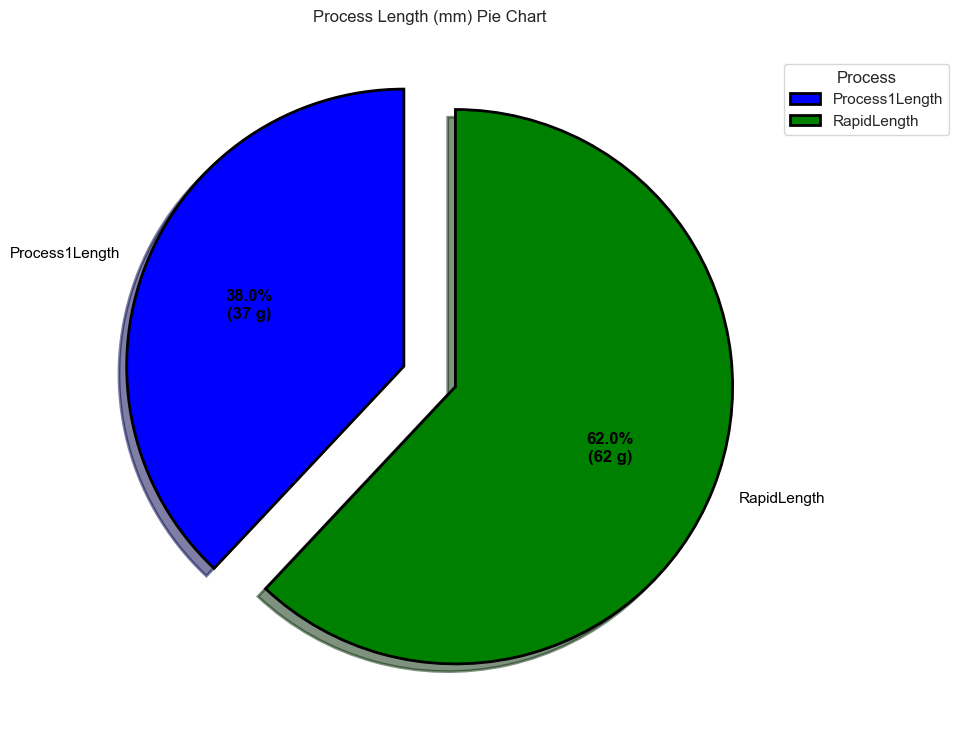

In [62]:
# Using the same pie chart as above
# This time looking at, and comparing 'Process1Length' vs. 'RapidLength'
# Again this is a great way of clearly displaying differences
# Results are again surprising and highlight areas in need of much improvement

Process = ['Process1Length', 'RapidLength']
 
data = [38, 62]
 
explode = (0.1, 0.1,)
 
colors = ( 'Blue', 'Green',)    
 
wp = { 'linewidth' : 2, 'edgecolor' : 'Black' }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(12, 9))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Process,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ='Black'))
 
ax.legend(wedges, Process,
          title ='Process',
          loc ="center left",
          bbox_to_anchor =(1, 0.4, 5, 1))
 
plt.setp(autotexts, size = 12, weight ='bold')
ax.set_title('Process Length (mm) Pie Chart')
 
plt.show()

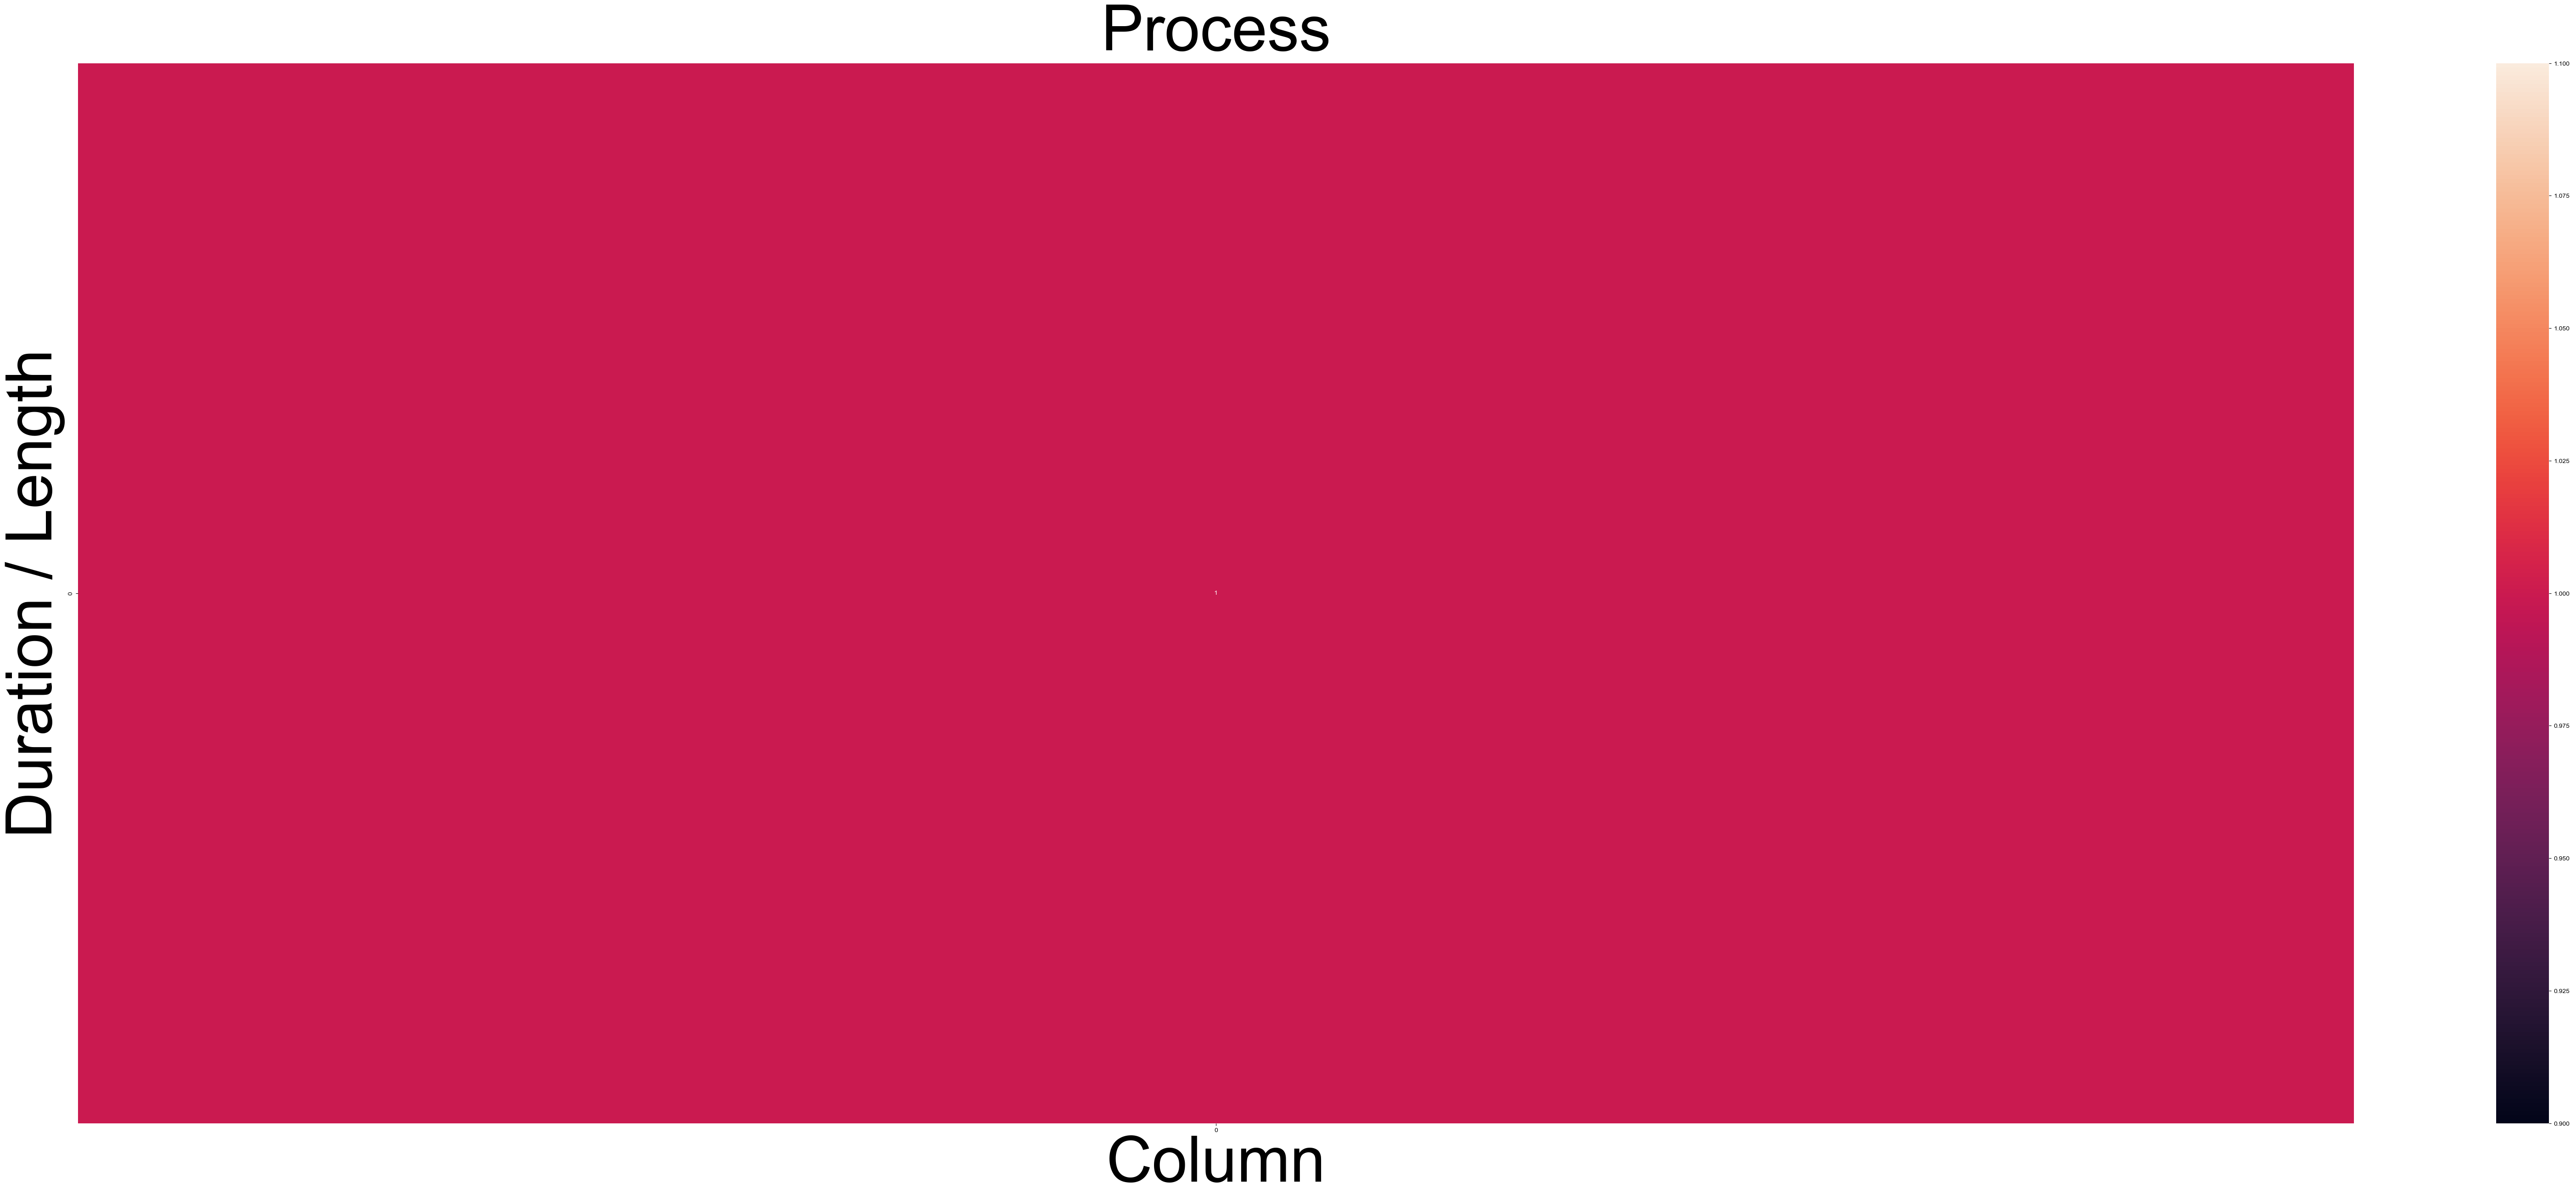

In [56]:
# Determing graph size

plt.figure(figsize=(80,30))

# Could not get this Heatmap to display correclty, spent hours on this but couldn't get it to work
# Will request feedback from course lecturers on where I'm going wrong
# Below attempt at least shows my intent

df = pd.DataFrame(data)

heatplot = ax.imshow(df,cmap = 'BuPu')

df = df.corr()
sns.heatmap(df, annot=True)
sns.set_theme(style='ticks')
plt.xlabel('Column', fontsize=100)
plt.title('Process', fontsize=100)
plt.ylabel('Duration / Length', fontsize=100)
plt.show()

# Step 8: Conclusion

In [ ]:
# This data set has been facinating to work through 
# With the data set being my own (Babcocks) all the information we were able to pull from it really makes sense 

# This evaluation of the ESAB machine over the course of a four week duration has been invaluable 
# Many areas in the Program life cycle on the ESAB have been highlighted and need to be revisited
# With the findings provided it better places me to know what to target and go after
# Findings will allow me to streamline processes, shave time and better understand resource 

# There are many features within the machine that we do not have enabled, these features are listed below...
#                                                    InkJet Station run time
#                                                    Injet Station linear distance travelled
#                                                    Text Marking Station run time
#                                                    Text Marking Station linear distance travelled
#                                                    Vaccum Blast Station run time
#                                                    Vaccum Blast Station linear distance travelled

# Above features were displayed in the original df.csv data set before we started the cleaing process
# We deleted all columns that would have contained this information as they all contained no values 
# To enalbe said columns with usable data a software update to the machine is required
# This update is supplied by the machine tool vendor at a cost 
# As a business unit we were reluctant to purchase this upgrade as we didn't understand it's value
# With the learning achieved through this course and the study completed in this document we now understand it's value
# We are now in a comfortable position to create a business justification to procure said software update
# We can use this document as the fundations of the business case


# Initial things to further investigate, understand, and streamline are listed below...
     # Removing completed parts from the machine bed is accountable for 81% of time
     # Program run time when the Plasma Torch is cutting is only accountable for 19% of time
# Suggest we look at better ways of removing parts from the machine bed       
# We need to drive program run time up and part removal time down

     # The distance travelled by the Plasma Torch whilst cutting is accountable for 38% of total distance travelled
     # Distance travelled by the Plasma Torch when NOT cutting is accountable for 62% of distance travelled
# We must look at nesting strategies to reduce Plasma Torch travel time when not cutting
# All moves made when not cutting are fresh air moves and not adding value to the product
# Fresh air moves can be drastically reduced by re-sequencing nest movements 
# Thus spending more time cutting steel and less time traversing in fresh air
# The knock on effect of this is overall nesting times are reduced and efficiencies increased 
# Ultimately this all works towords increasing our cut steel weight which is the Program goal

# Other things to note, we can determine how many Nests were successfully ran during studied time frame
# Number of Nests successfully completed was 94 in Number
# This can now be measured against, thus tracking trends and improvements in efficiency

